https://colab.research.google.com/drive/1s4iCSuwuBtIxRITReMcN4kWuoSzvzHK-/

add dataset https://drive.google.com/file/d/1ZVDv3uVLeTg6TNZueamunoa4atQNGVn_/ shortcut to MyDrive (bangkit)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02.zip'

Archive:  /content/drive/MyDrive/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02.zip
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/desktop.ini  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/A (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/B (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/C (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/D (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/E (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/F (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/G (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/H (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/I (1).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/J (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/K (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/

In [ ]:
base_dir = '/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/'
train_dir = base_dir + 'training/'
val_dir = base_dir + 'validation/'

(2000, 2000, 3)

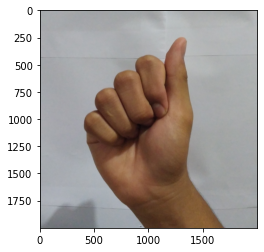

In [ ]:
sample = plt.imread(train_dir + 'A/A (1).jpg')
plt.imshow(sample)
sample.shape

In [ ]:
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights='imagenet')
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# x = layers.Conv2D(64, 3, activation='relu')(base_model.output)
# x = layers.MaxPooling2D()(x)
# x = layers.Conv2D(128, 3, activation='relu')(x)
# x = layers.MaxPooling2D()(x)
# x = layers.Conv2D(256, 3, activation='relu')(x)
# x = layers.MaxPooling2D()(x)
# x = layers.Conv2D(512, 3, activation='relu')(x)
# x = layers.MaxPooling2D()(x)
x = layers.Flatten()(base_model.output)
x = layers.Dropout(.25)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(26, activation='softmax')(x)
model = Model(base_model.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
train_data = ImageDataGenerator(
                                rescale=1/255, 
                                rotation_range=10,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2,
                                brightness_range=[0.8,1.2]
                                )
val_data = ImageDataGenerator(rescale=1/255)
train_gen = train_data.flow_from_directory(train_dir, target_size=(224, 224))
val_gen = val_data.flow_from_directory(val_dir, target_size=(224, 224))

Found 1092 images belonging to 26 classes.
Found 220 images belonging to 26 classes.


In [ ]:
print(val_gen)

In [ ]:
model.fit(train_gen, validation_data=val_gen, epochs=50)
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/JpegImagePlugin.py:793: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Epoch 1/50
35/35 [==============================] - 138s 4s/step - loss: 11.8508 - accuracy: 0.1026 - val_loss: 2.8803 - val_accuracy: 0.1955
Epoch 2/50
35/35 [==============================] - 120s 3s/step - loss: 2.5882 - accuracy: 0.2482 - val_loss: 2.6905 - val_accuracy: 0.2455
Epoch 3/50
35/35 [==============================] - 120s 3s/step - loss: 2.1770 - accuracy: 0.3507 - val_loss: 2.3545 - val_accuracy: 0.3045
Epoch 4/50
35/35 [==============================] - 117s 3s/step - loss: 1.8924 - accuracy: 0.4396 - val_loss: 2.2599 - val_accuracy: 0.3227
Epoch 5/50
35/35 [==============================] - 120s 4s/step - loss: 1.9618 - accuracy: 0.4185 - val_loss: 2.1350 - val_accuracy: 0.3682
Epoch 6/50
35/35 [==============================] - 118s 3s/step - loss: 1.7135 - accuracy: 0.4927 - val_loss: 1.8941 - val_accuracy: 0.3955
Epoch 7/50
35/35 [==============================] - 118s 3s/step - loss: 1.7410 - accuracy: 0.4670 - val_loss: 2.2029 - val_accuracy: 0.3455
Epoch 8/50
3

FileNotFoundError: ignored

In [ ]:
!zip -r /content/file.zip /content/saved_model
from google.colab import files
files.download("/content/file.zip")

model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
# new_model.summary()

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 91%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 77%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 30%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 95%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# model.fit(train_gen, validation_data=val_gen, epochs=50)
# # Save the entire model as a SavedModel.
# !mkdir -p saved_model
# model.save('saved_model/my_model')
# !zip -r /content/file.zip /content/saved_model
# from google.colab import files
# files.download("/content/file.zip")

# model = tf.keras.models.load_model('saved_model/my_model')

# # Check its architecture
# # new_model.summary()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/JpegImagePlugin.py:793: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Epoch 1/50
35/35 [==============================] - 115s 3s/step - loss: 0.4710 - accuracy: 0.8462 - val_loss: 0.9370 - val_accuracy: 0.7682
Epoch 2/50
35/35 [==============================] - 112s 3s/step - loss: 0.4725 - accuracy: 0.8571 - val_loss: 0.7674 - val_accuracy: 0.7682
Epoch 3/50
35/35 [==============================] - 111s 3s/step - loss: 0.4749 - accuracy: 0.8571 - val_loss: 0.9988 - val_accuracy: 0.7545
Epoch 4/50
35/35 [==============================] - 111s 3s/step - loss: 0.4995 - accuracy: 0.8443 - val_loss: 0.6501 - val_accuracy: 0.8182
Epoch 5/50
35/35 [==============================] - 111s 3s/step - loss: 0.3823 - accuracy: 0.8800 - val_loss: 0.8524 - val_accuracy: 0.7864
Epoch 6/50
35/35 [==============================] - 111s 3s/step - loss: 0.4674 - accuracy: 0.8480 - val_loss: 0.8785 - val_accuracy: 0.8091
Epoch 7/50
35/35 [==============================] - 111s 3s/step - loss: 0.4231 - accuracy: 0.8626 - val_loss: 0.5938 - val_accuracy: 0.8091
Epoch 8/50
35

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model')
model.fit(train_gen, validation_data=val_gen, epochs=50)
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')
!zip -r /content/file.zip /content/saved_model
from google.colab import files
files.download("/content/file.zip")

# model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model')

# Check its architecture
# new_model.summary()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/JpegImagePlugin.py:793: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Epoch 1/50
35/35 [==============================] - 129s 3s/step - loss: 0.2807 - accuracy: 0.9084 - val_loss: 0.5890 - val_accuracy: 0.8500
Epoch 2/50
35/35 [==============================] - 110s 3s/step - loss: 0.2102 - accuracy: 0.9286 - val_loss: 0.6692 - val_accuracy: 0.8636
Epoch 3/50
35/35 [==============================] - 107s 3s/step - loss: 0.1659 - accuracy: 0.9460 - val_loss: 0.6458 - val_accuracy: 0.8773
Epoch 4/50
35/35 [==============================] - 108s 3s/step - loss: 0.2189 - accuracy: 0.9368 - val_loss: 0.5070 - val_accuracy: 0.8818
Epoch 5/50
35/35 [==============================] - 108s 3s/step - loss: 0.2407 - accuracy: 0.9231 - val_loss: 0.8588 - val_accuracy: 0.8182
Epoch 6/50
35/35 [==============================] - 107s 3s/step - loss: 0.2823 - accuracy: 0.9148 - val_loss: 0.6915 - val_accuracy: 0.8455
Epoch 7/50
35/35 [==============================] - 108s 3s/step - loss: 0.1901 - accuracy: 0.9377 - val_loss: 0.6678 - val_accuracy: 0.8727
Epoch 8/50
35

In [ ]:
# model.save('model.h5')

In [ ]:
# # Save the entire model as a SavedModel.
# !mkdir -p saved_model
# model.save('saved_model/my_model')
# !zip -r /content/file.zip /content/Folder_To_Zip
# from google.colab import files
# files.download("/content/file.zip")

# new_model = tf.keras.models.load_model('saved_model/my_model')

# # Check its architecture
# new_model.summary()

In [ ]:
# model.fit(train_gen, validation_data=val_gen, epochs=1)